# Урок 4. Визуальный анализ данных

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from seaborn import heatmap, pairplot

from sklearn.preprocessing import MinMaxScaler

In [2]:
alpha = 0.8
# c_map = plt.get_cmap('Pastel1')
c_map = plt.get_cmap('tab10')

## Задача 01

1. Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv
1. Изучите стоимости недвижимости
1.  Изучите распределение квадратуры жилой
1.  Изучите распределение года постройки

(построить график, назвать график, сделать именование оси x и оси y, сделать выводы)

In [3]:
source = 'https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv'

df = pd.read_csv(source)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
params = {
    'color': c_map.colors[0],
    'edgecolor': 'black',
    'alpha': alpha
}

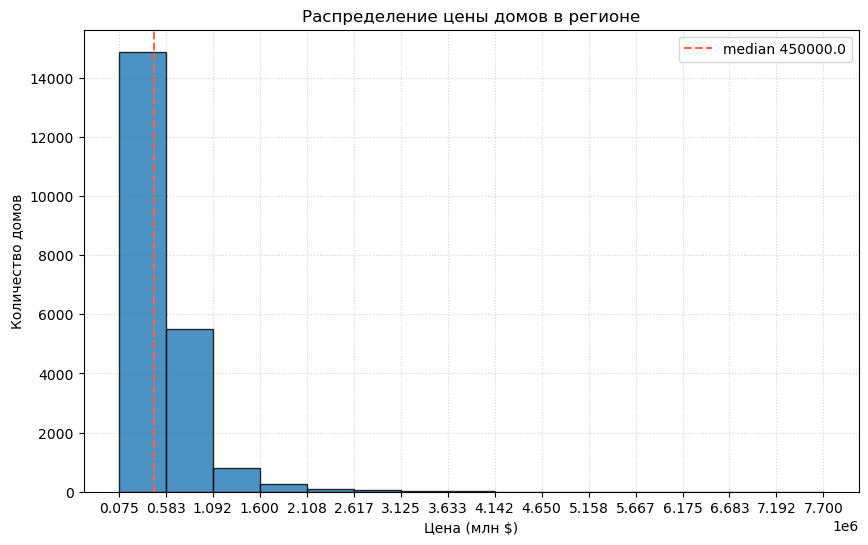

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

target = 'price'
md = df[target].median()

bins = ax.hist(df[target], **params, bins=15)
ax.axvline(md, color='tomato', ls='--', label=f'median {md}')

ax.set_xticks(bins[1])
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.legend()

ax.set_title('Распределение цены домов в регионе')
ax.set_xlabel('Цена (млн $)')
ax.set_ylabel('Количество домов');

- Рынок недвижимости региона представлен, в большей степени жильем эконом-класса. 
- Медианное значение цены составляет 450 тыс долларов. 

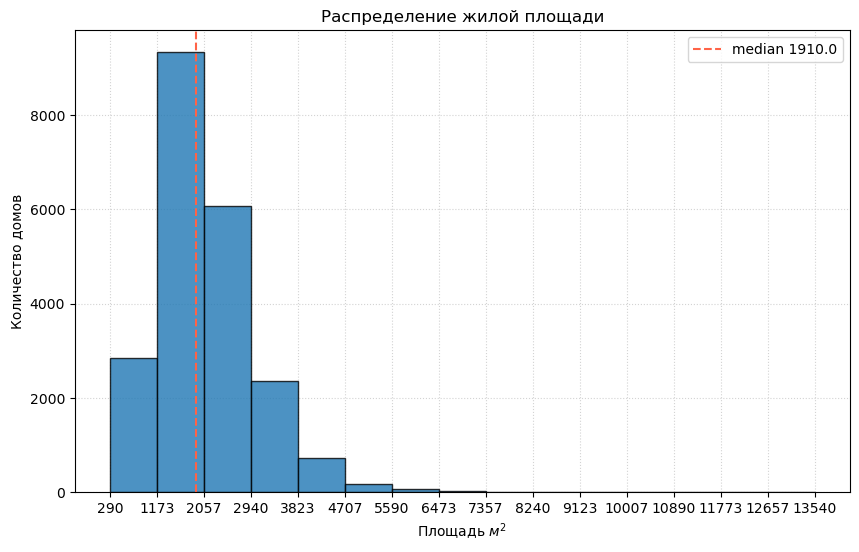

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

target = 'sqft_living'
md = df[target].median()

bins = ax.hist(df[target], **params, bins=15)
ax.axvline(md, color='tomato', ls='--', label=f'median {md}')

ax.set_xticks(bins[1])
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.legend()

ax.set_title('Распределение жилой площади')
ax.set_xlabel('Площадь $м^2$')
ax.set_ylabel('Количество домов');

- Половину предложений составляют дома от 290 до 1910 $м^2$
- Распределение так же - скошено влево. 

Из этих двух графиков предварительно можно заключить, что цена дома линейно зависит от его жилой площади (проверим позже)

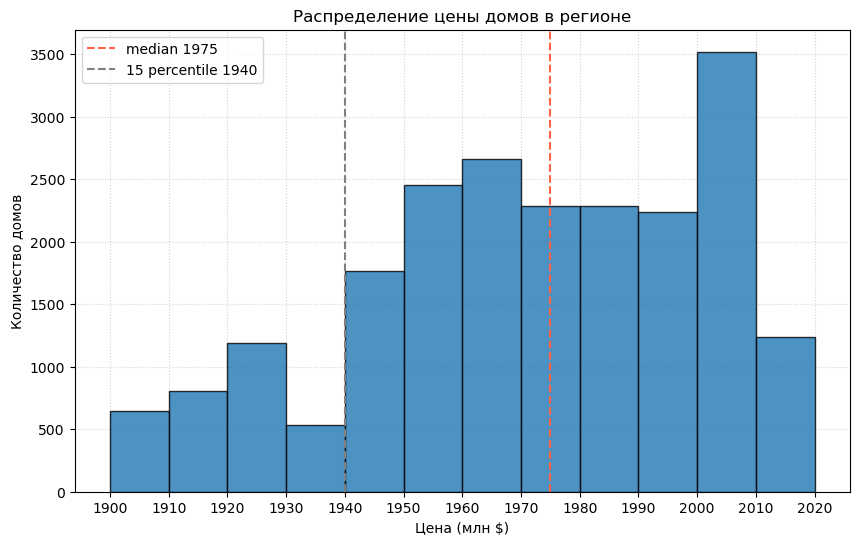

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

target = 'yr_built'
md = int(df[target].median())
pc15 = int(np.percentile(df[target], 15))
bins = range(1900, 2021, 10)

ax.hist(df[target].astype('int32'), **params, bins=bins)
ax.axvline(md, color='tomato', ls='--', label=f'median {md}')
ax.axvline(pc15, color='gray', ls='--', label=f'15 percentile {pc15}')

ax.set_xticks(bins)
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.legend()

ax.set_title('Распределение цены домов в регионе')
ax.set_xlabel('Цена (млн $)')
ax.set_ylabel('Количество домов');

- Половина домов построена в период 1907 - 1975 годов (на протяжении 68 лет)
- Вторая половина построена в период 1976 - 2015 годов (на протяжении 39 лет)

Если разбить год строительства дома на 3 сегмента (примерно по 40 лет), то получится, что на долю первого сегмента (назовем его "довоенным", хотя в тех краях войны не было) приходится 15% всех строений, на долю второго (назовем его периодом "от войны до потепления") приходится 25% всех строений, и на долю третьего периода (назовем его "новым") приходится 50% строений.

Из этого можно сделать вывод, что, чем старее дома, тем меньше их остается, либо, что они настолько надежны, что избавляться от них не торопятся, либо, что темпы строительства в тот период были несколько ниже, чем сейчас. 

А вот дома 2000 - 2010 наоборот, выставлены в самом большом количестве. Скорее всего - невостребованный нововстрой.

Ну и давайте, все же проверим, действительно дома с меньшей площадью стоят дешевле?

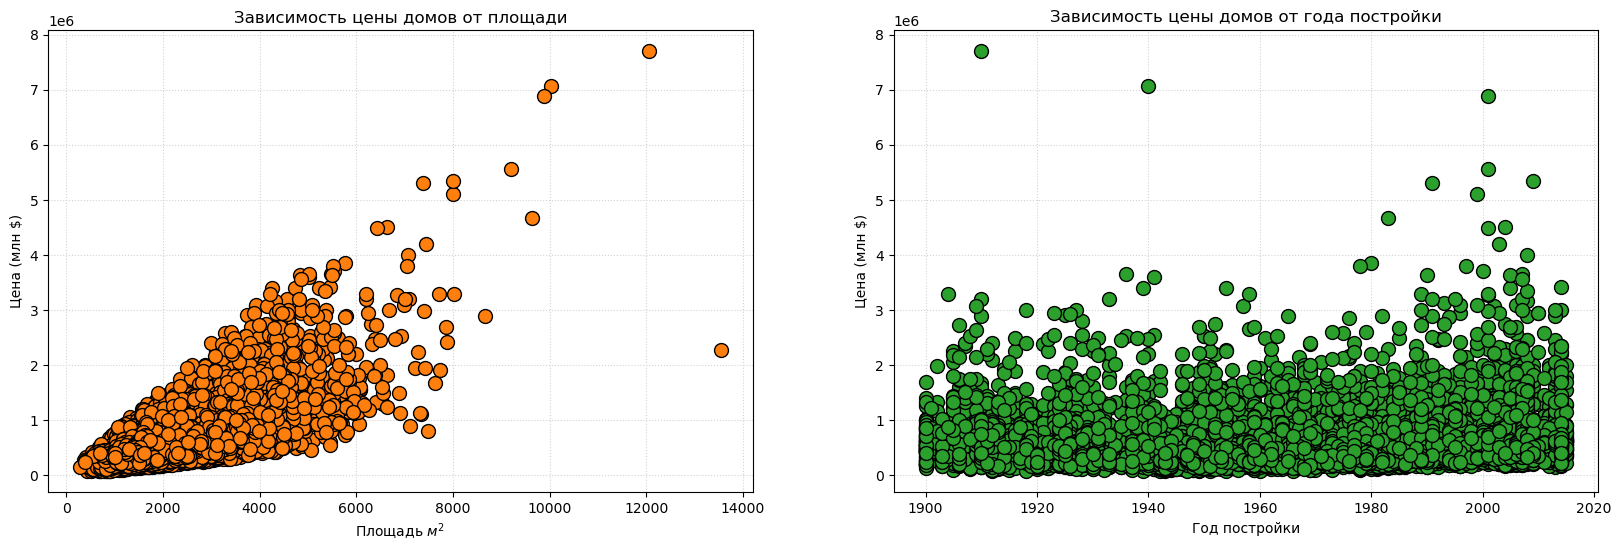

In [8]:
fig, axx = plt.subplots(1, 2, figsize=(20, 6))

ax = axx[0]
ax.scatter(df['sqft_living'], df['price'], s=100, color=c_map.colors[1], edgecolor='black')

ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('Зависимость цены домов от площади')
ax.set_ylabel('Цена (млн $)')
ax.set_xlabel('Площадь $м^2$');

ax = axx[1]
ax.scatter(df['yr_built'], df['price'], s=100, color=c_map.colors[2], edgecolor='black')

ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('Зависимость цены домов от года постройки')
ax.set_ylabel('Цена (млн $)')
ax.set_xlabel('Год постройки');

Да, действительно, площадь влияет на цену дома. Причем, чем ниже площадь, тем сильнее это влияние. А вот год постройки на цену дома не влияет никак.

## Задача 02

1. Изучите распределение домов от наличия вида на набережную
1. Изучите распределение этажей домов
2. Изучите распределение состояния домов

(построить график, сделать выводы)

In [9]:
params['color'] = c_map.colors

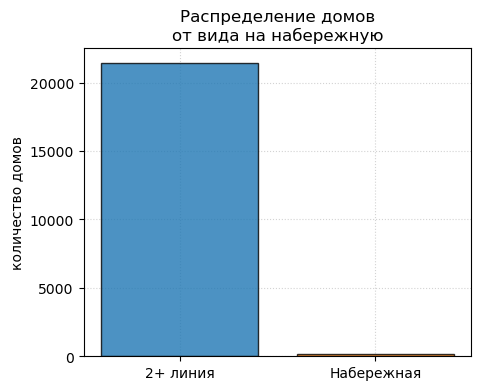

In [10]:
fig, ax = plt.subplots(figsize=(5, 4))

tmp = df.groupby('waterfront', as_index=False).agg({'id': 'count'}).rename(columns={'id': 'qty'})

ax.bar(tmp['waterfront'], 
       tmp['qty'], 
       **params)

ax.set_xticks([0, 1])
ax.set_xticklabels(['2+ линия', 'Набережная'])
ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('Распределение домов\nот вида на набережную')
ax.set_ylabel('количество домов');

Очевидно, что домов на набережной не так много 🙂

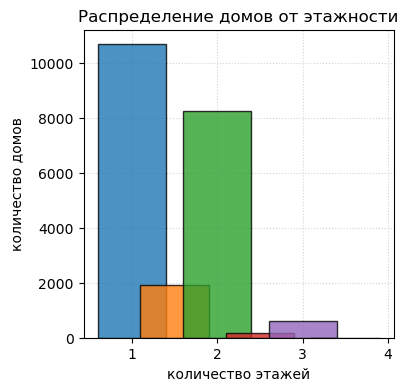

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))

tmp = df.groupby('floors', as_index=False).agg({'id': 'count'}).rename(columns={'id': 'qty'})

ax.bar(tmp['floors'], 
       tmp['qty'], 
       **params)

ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('Распределение домов от этажности')
ax.set_xlabel('количество этажей')
ax.set_ylabel('количество домов');

Очень странные показатели промежуточных этажей. Я не архитектор, но - видимо это нормально.

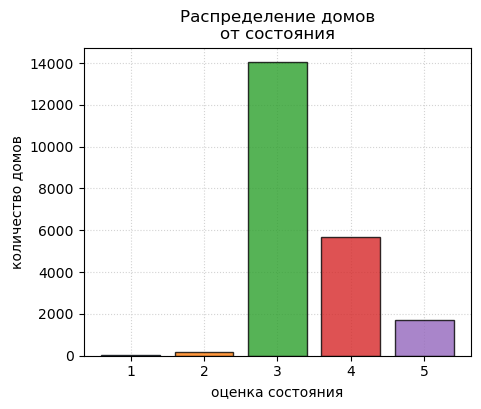

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))

tmp = df.groupby('condition', as_index=False).agg({'id': 'count'}).rename(columns={'id': 'qty'})

ax.bar(tmp['condition'], 
       tmp['qty'], 
       **params)

ax.grid(ls=':', color='lightgray')
ax.set_axisbelow(True)
ax.set_title('Распределение домов\nот состояния')
ax.set_xlabel('оценка состояния')
ax.set_ylabel('количество домов');

Что можно сказать? 

- "Убитых" домов на рынке немного
- Больше всего продается "середнечков"

Общее соотношение домов составляет ~60/40 ("середнечков"/"ухоженных")

## Задача 03

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Начнем тогда с очистки признаков:
- Вряд ли ID записи влияет на стоимость дома, как, собственно, и дата его продажи.
- Можно убрать широту и долготу (у меня не установлены гео библиотеки, и я не очень хочу ставить этот балласт)
- Так же мне что-то подсказывает, что показатели соседних домов тоже не слишком влияют на цену (как и zipcode)

Ну а так как наши признаки не распределены нормально (это мы видели на примере цен, квадратур и годов постройки), для расчета корреляции будем использовать коэффициент Спирмена. 

Для интерпретации результатов будем придерживаться стандартной таблицы:

|Значение|Эффект|
|--------|------|
|0.0 - 0.3 |оч. слабая|
|0.3 - 0.5 |слабая|
|0.5 - 0.7|средняя|
|0.7 - 0.9|высокая|
|0.9 - 1.0|оч. высокая|

In [13]:
drop_columns = ['id', 'date', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode']

df.drop(drop_columns, axis=1, inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0


Но, для начала, т.к. коэффициент корреляции имеет линейную природу , проверимся на выбросы:

<AxesSubplot: >

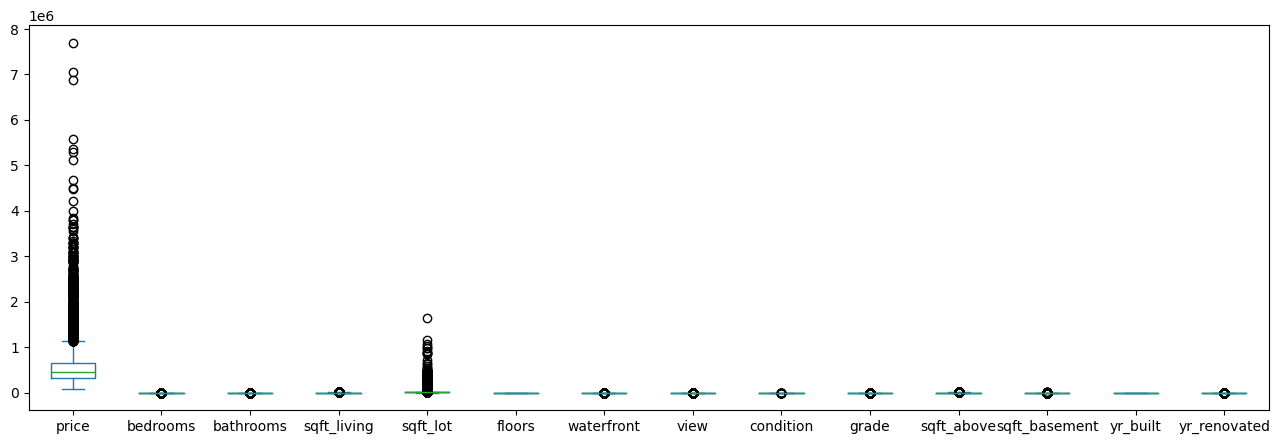

In [14]:
fig, ax = plt.subplots(figsize=(16,5))
df.plot(kind='box', ax=ax)

Понятно, что картинка не показательна, но попробуем ей воспользоваться, чтобы разглядеть, что размерности у всех критериев разные. Очень плохая была идея.

In [15]:
mms = MinMaxScaler()
df_scale = mms.fit_transform(df)
df_scale = pd.DataFrame(data=df_scale, columns=mms.feature_names_in_)

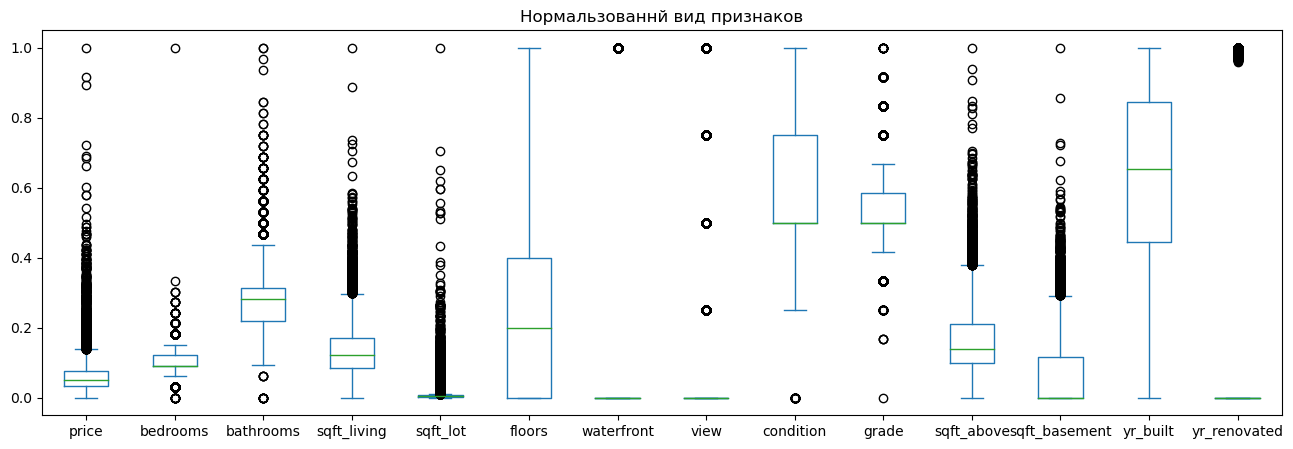

In [16]:
fig, ax = plt.subplots(figsize=(16,5))
df_scale.plot(kind='box', ax=ax)

ax.set_title('Нормальзованнй вид признаков');

Так сравнение будет понагляднее. 

Видим, что есть много выбросов в price, sqft_living, sqft_lot, sqft_above и sqft_basement.

Причем, довольно логично, что выбросы могут быть у подвала (там медиана на нуле лежит), но все остальные показатели предлагаю "подрезать" на 1%

In [17]:
fields = ['price', 'sqft_living', 'sqft_lot', 'sqft_above']
borders = []

for i in fields:
    borders.append(df[i].quantile(0.99))

print('Было:\t', df.shape[0])
    
for i, k in zip(fields, borders):
    df = df[df[i] < k].copy()
    
print('Стало:\t',df.shape[0])

Было:	 21613
Стало:	 20989


Потеряно не так много данных, но выбросов стало меньше. Можно посмотреть на корреляцию:

In [18]:
df.corr(method='spearman').iloc[0, :]

price            1.000000
bedrooms         0.324807
bathrooms        0.469436
sqft_living      0.621433
sqft_lot         0.030696
floors           0.306224
waterfront       0.085594
view             0.267323
condition        0.024243
grade            0.636504
sqft_above       0.513010
sqft_basement    0.243008
yr_built         0.085155
yr_renovated     0.099320
Name: price, dtype: float64

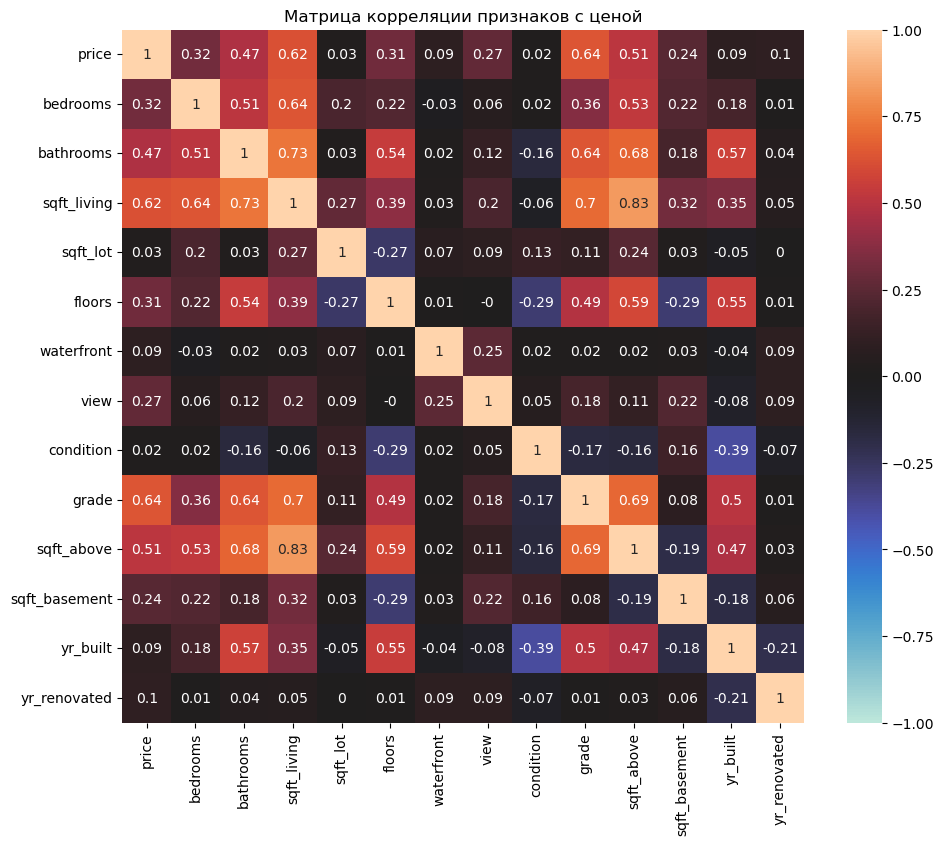

In [19]:
fig, ax = plt.subplots(figsize=(11, 9))

heatmap(np.around(df.corr(method='spearman'), 2), vmax=1, vmin=-1, center=0, annot=True)

ax.set_title('Матрица корреляции признаков с ценой');

Если отбросить очень слабые сигналы, то вилдим, что:
1. Слабая корреляция есть по bedrooms, bathrooms, floors
1. Средние значения видим по sqft_living, grade и sqft_above

Не так мало признаков?

Уберем другие и посмотрим

In [20]:
columns = ['price', 'floors', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_living', 'grade']

df = df[columns].copy()

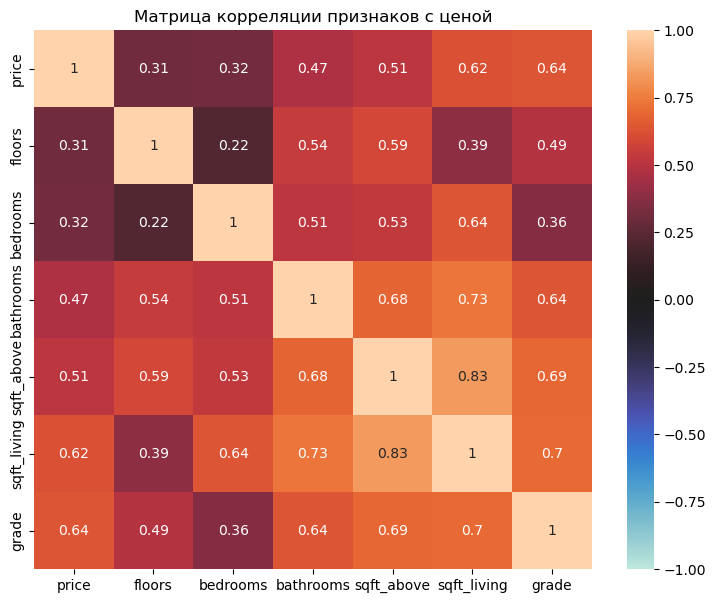

In [21]:
fig, ax = plt.subplots(figsize=(9, 7))

heatmap(np.around(df.corr(method='spearman'), 2), vmax=1, vmin=-1, center=0, annot=True)

ax.set_title('Матрица корреляции признаков с ценой');

А видим мы тут достаточно сильную коллинеарность, а это значит, что все эти признаки впрямую влияют не только на цену, но и друг на друга.

Отстроим эти показатели:

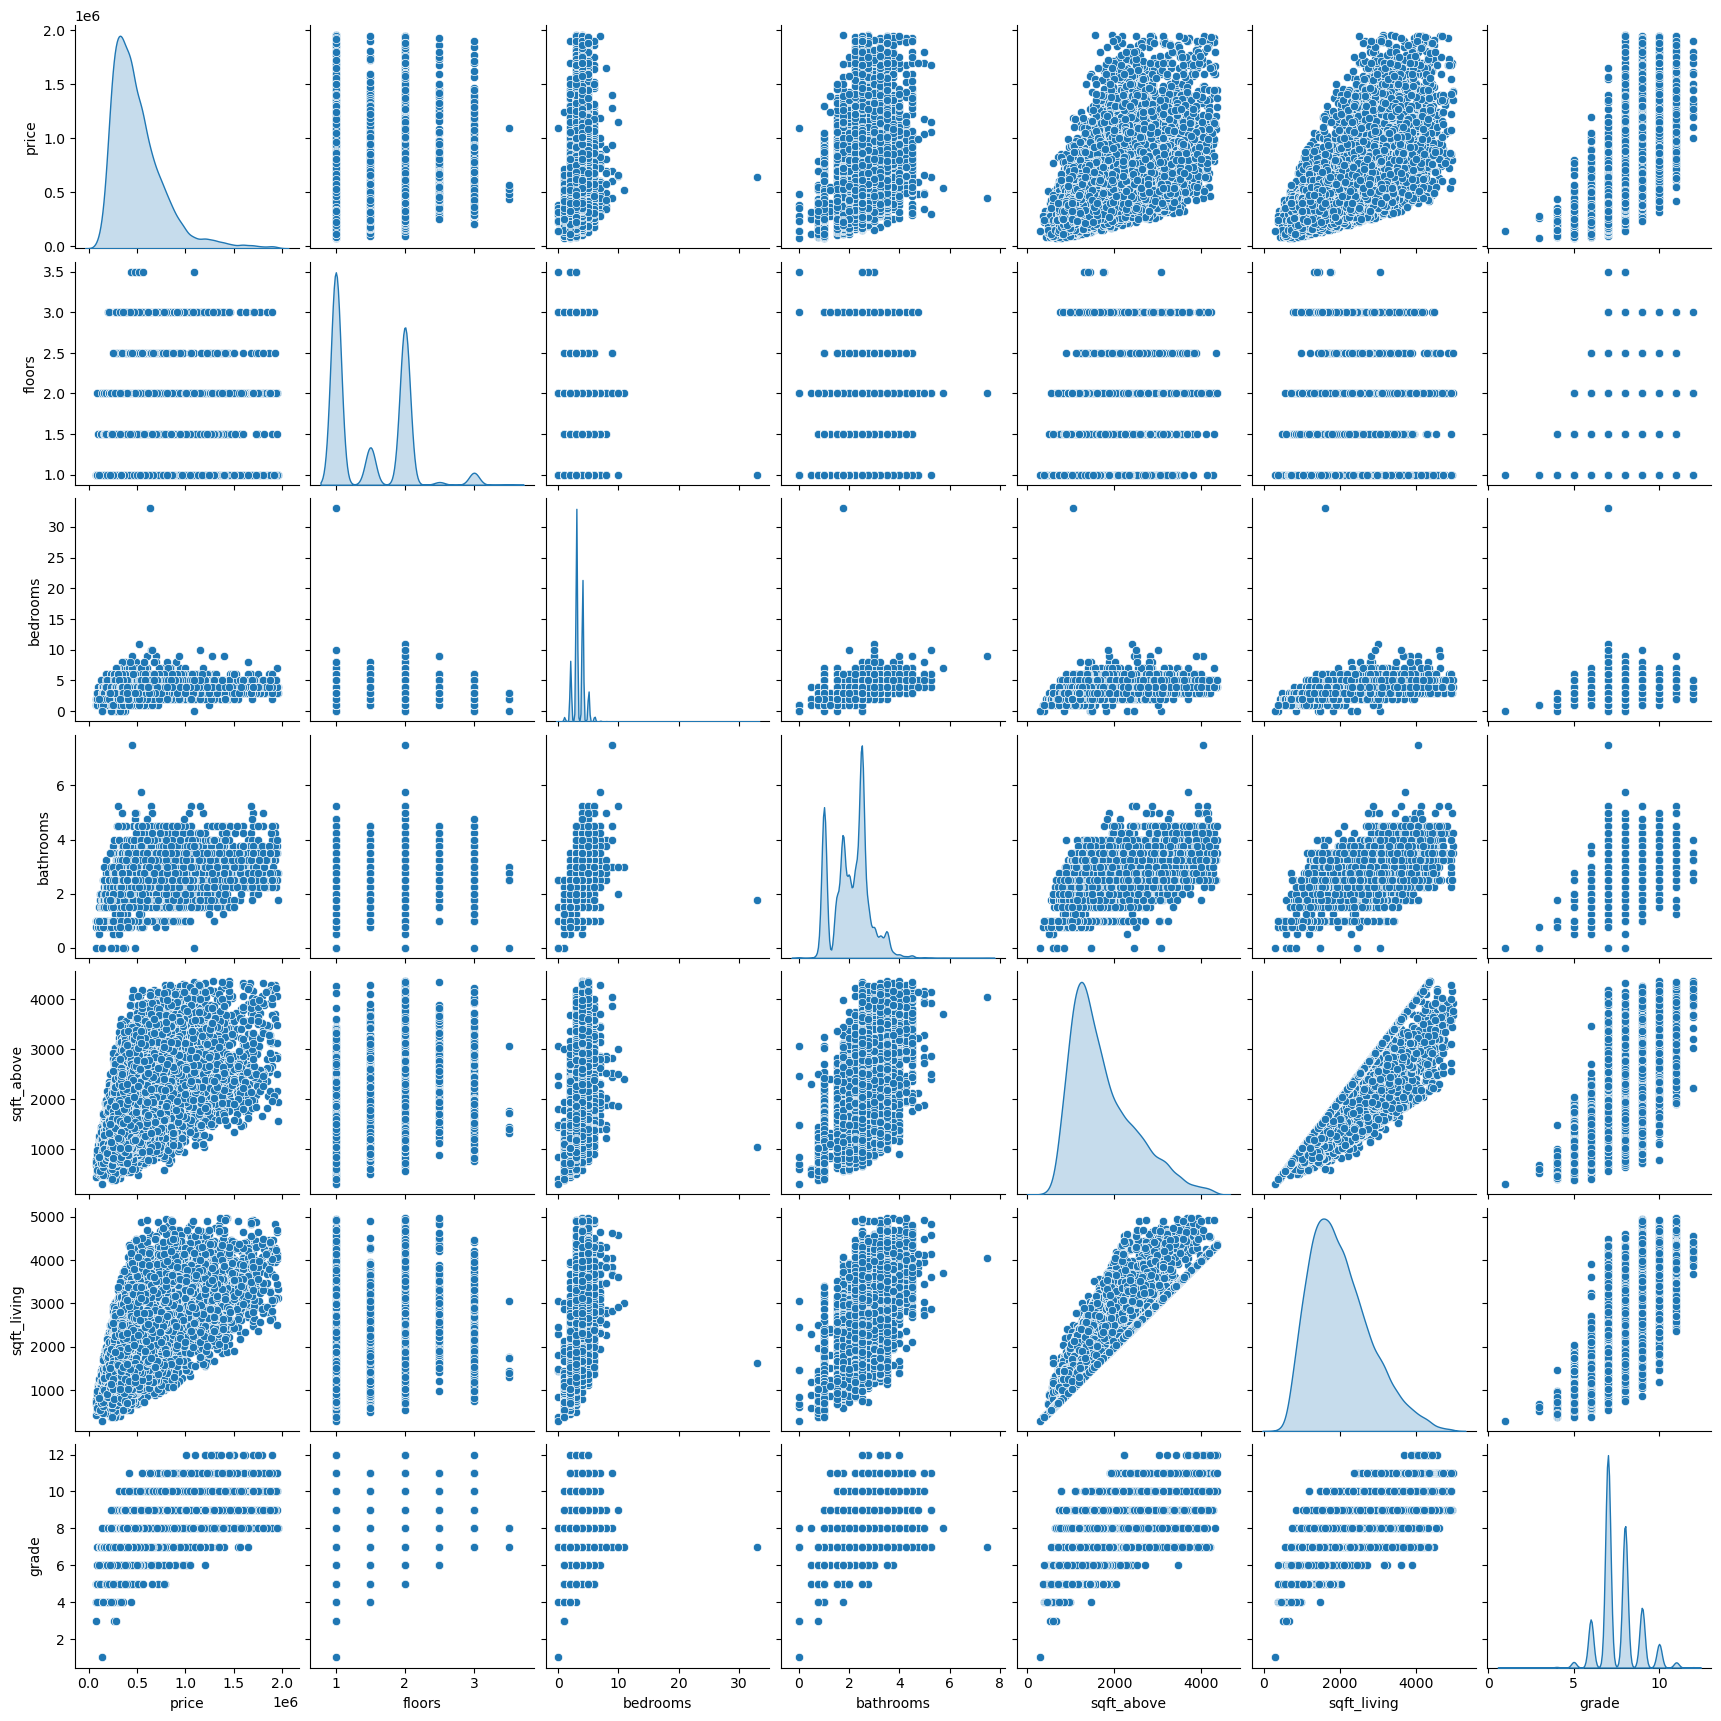

In [22]:
pairplot(df, diag_kind="kde")

Да, действительно, 3 слабых показателя (floors, bedrooms и bathroom) мало походят на линейную зависимость. 

Остальнве показатели демонстрируют каку-никакую, но - зависимость.

Таким образом, делаю **вывод**, что основными показателями, которые влияют на стоимость дома, являются sqft_above, sqft_living и grade.